<a href="https://colab.research.google.com/github/Confidentrf/AI/blob/Machine-Learning/Perception_Binary_classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Training Perception cinary classifications


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# example making new class predictions for a classification problem
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

speed_data = pd.read_csv("speed_decision_data.csv")

<Axes: xlabel='1 - Distance From Bump', ylabel='Height of Bump'>

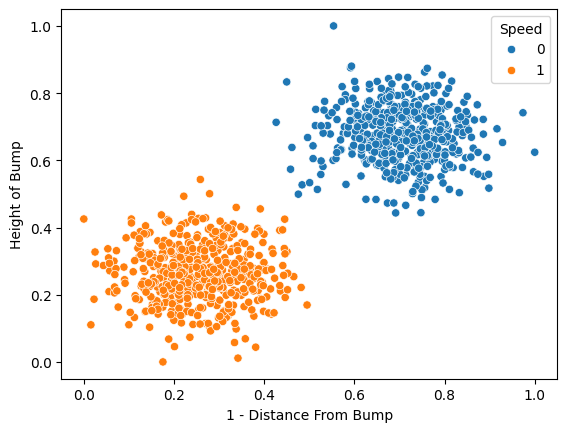

In [6]:
sns.scatterplot(x=speed_data['1 - Distance From Bump'], y=speed_data['Height of Bump'], hue = speed_data['Speed'])

In [7]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]

In [8]:
y_train = speed_data['Speed']

In [9]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 - 1s - 31ms/step - loss: 0.6821
Epoch 2/100
32/32 - 0s - 2ms/step - loss: 0.6760
Epoch 3/100
32/32 - 0s - 2ms/step - loss: 0.6703
Epoch 4/100
32/32 - 0s - 4ms/step - loss: 0.6647
Epoch 5/100
32/32 - 0s - 2ms/step - loss: 0.6593
Epoch 6/100
32/32 - 0s - 2ms/step - loss: 0.6541
Epoch 7/100
32/32 - 0s - 4ms/step - loss: 0.6489
Epoch 8/100
32/32 - 0s - 2ms/step - loss: 0.6438
Epoch 9/100
32/32 - 0s - 2ms/step - loss: 0.6388
Epoch 10/100
32/32 - 0s - 2ms/step - loss: 0.6340
Epoch 11/100
32/32 - 0s - 2ms/step - loss: 0.6291
Epoch 12/100
32/32 - 0s - 2ms/step - loss: 0.6243
Epoch 13/100
32/32 - 0s - 2ms/step - loss: 0.6196
Epoch 14/100
32/32 - 0s - 2ms/step - loss: 0.6149
Epoch 15/100
32/32 - 0s - 2ms/step - loss: 0.6103
Epoch 16/100
32/32 - 0s - 4ms/step - loss: 0.6058
Epoch 17/100
32/32 - 0s - 2ms/step - loss: 0.6013
Epoch 18/100
32/32 - 0s - 4ms/step - loss: 0.5968
Epoch 19/100
32/32 - 0s - 2ms/step - loss: 0.5923
Epoch 20/100
32/32 - 0s - 4ms/step - loss: 0.5879
Epoch 21/100
32/32 -

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [11]:
# make a prediction
#y_train_predict = model.predict_classes(X_train)  Deprecated syntax, although it was a lot simpler...
y_train_predict = (model.predict(X_train) > 0.5).astype("int32")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


<Axes: >

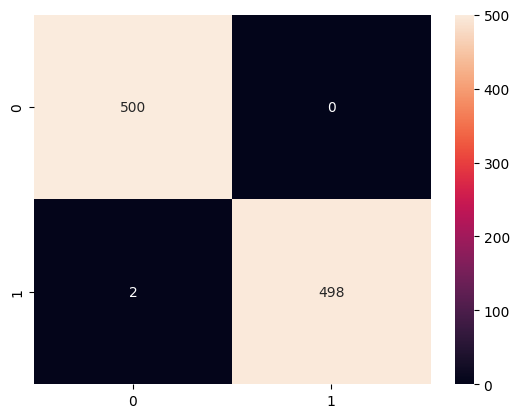

In [12]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, fmt="d")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<ipython-input-13-37ee7a525ee9>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


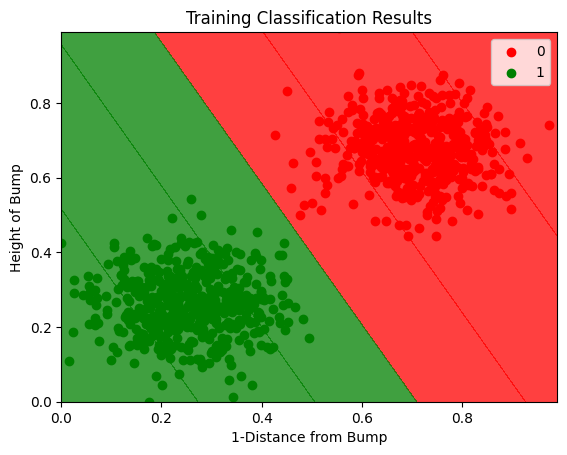

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train.values, y_train.values

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['red', 'green']))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(['red', 'green'])(i), label = j)

plt.title('Training Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

In [14]:
weights, biases = model.layers[0].get_weights()

In [15]:
weights

array([[-2.9777663],
       [-1.5749636]], dtype=float32)

In [16]:
biases

array([1.9115375], dtype=float32)